In [248]:
import gym_bondgraph
import gymnasium as gym
from bond_graph import *
import numpy as np

%reload_ext autoreload
%autoreload 2

Not connected
False


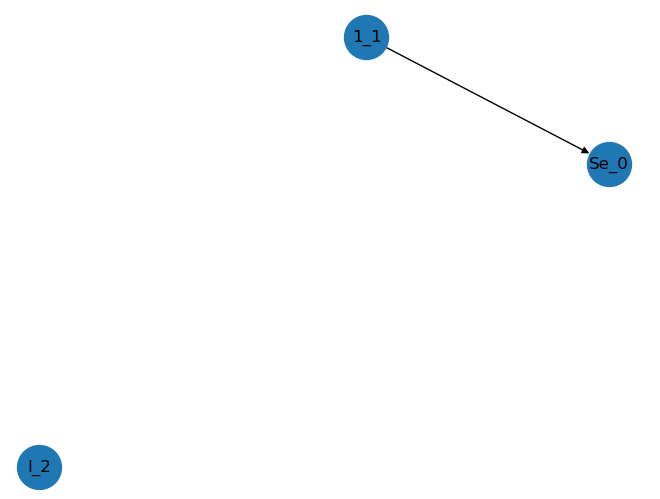

In [249]:
MAX_NODES = 8
MAX_STATES = 4

t_span = [0, 10]
time_array = np.linspace(t_span[0], t_span[1], 500)

s0 = BondGraph(max_nodes=MAX_NODES, max_states=MAX_STATES, time_array=time_array)
s0.add_element(EffortSource())
s0.add_element(OneJunction())
s0.add_bond(1, 0, -1)
s0.add_element(Inertance(1))
# s0.add_bond(2, 1, -1)

print(s0.is_valid_solution(verbose=True))
# print(s0.flow_causal_graph.in_degree(1))

labels = nx.get_node_attributes(s0.flow_causal_graph, 'element_label')
nx.draw(s0.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)


In [250]:
default_params = {
    'R': 1,
    'I': 1,
    'C': 1,
}
seed = np.random.randint(1,100)
# seed=420
env = gym.make('gym_bondgraph/BondGraphEnv-v4',  seed=None, seed_graph=s0, max_nodes=MAX_NODES, default_params=default_params)


## Manual Action Adding

In [205]:
env.reset()
# action = env.action_space.sample()
# action = {
#     'node_or_bond': 0, # 0 for add node, 1 for add edge
#     "node_type": BondGraphElementTypes.CAPACITANCE.value,
#     "bond": [1, 0, 0], # 0 for negative bond sign, 1 for positive
#     "node_param": 5
#     }

# observation, reward, terminated, na, info = env.step(action)

# causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

# print("Causal Adjacency Mask: \n", causal_adjacency_mask)
# print()
# print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
# print()

# print("Action: ", action)

# print("Observation: ", observation)
# print("Reward: ", reward)
# print("Terminated: ", terminated)
# print("Info: ", info)

({'node_type_space': array([1, 4, 6, 0, 0]),
  'node_param_space': array([0., 0., 1., 0., 0.]),
  'adjacency_matrix_space': array([[0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]], dtype=int32)},
 {'num_nodes': 3,
  'node_info': NodeDataView({0: {'element_type': <BondGraphElementTypes.EFFORT_SOURCE: 1>, 'max_ports': 1, 'params': {}, 'Se': Se_0, 'element_label': 'Se_0'}, 1: {'element_type': <BondGraphElementTypes.ONE_JUNCTION: 4>, 'max_ports': None, 'params': {}, 'element_label': '1_1'}, 2: {'element_type': <BondGraphElementTypes.INERTANCE: 6>, 'max_ports': 1, 'params': {'I': 1}, 'p': p_2, 'p_dot': p_dot_2, 'element_label': 'I_2'}})})

## Random action sampling

In [251]:

env.reset()
num_invalid_systems = 0
num_valid_systems = 0
valid_systems = []
for i in range(10000):
    action = env.action_space.sample()
    # print("Action: ", action)

    observation, reward, terminated, _, info = env.step(action)
    if env.bond_graph.is_valid_solution():
        num_valid_systems+=1
        print("Reward: ", reward)
        if(reward>0):
            valid_systems.append(env.bond_graph)
    else:
        num_invalid_systems+=1
    
    if terminated:
        env.reset()
    # print("Observation: ", observation)


    # print("Terminated: ", terminated)
    # print("Node Addition Mask: ", env.bond_graph.get_element_addition_mask())
    # print("---------------------------------")
print("Valid Systems: ", num_valid_systems)
print("Invalid Systems: ", num_invalid_systems)
    


Reward:  106.36614880391552
Reward:  -1
Singular value matrix detected. Cannot solve.
Reward:  -9900
Reward:  -1
Reward:  106.36166760782262
Reward:  -1
Reward:  100.0
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  100.0
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
Reward:  -1
R

7


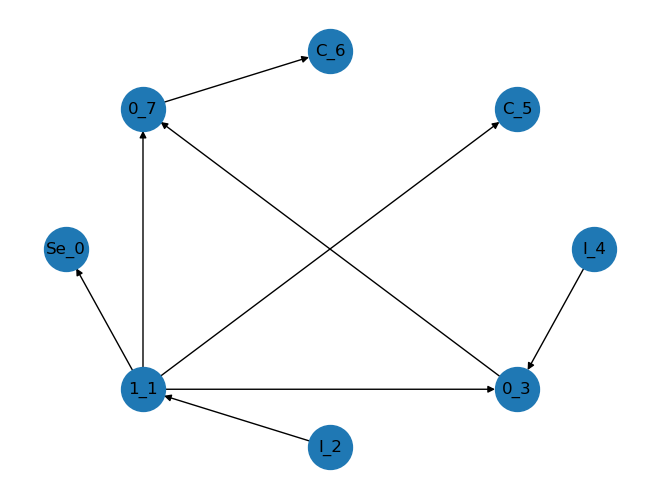

In [252]:
print(len(valid_systems))

i = 0
labels = nx.get_node_attributes(valid_systems[i].flow_causal_graph, 'element_label')
nx.draw_shell(valid_systems[i].flow_causal_graph, labels=labels, with_labels=True, node_size=1000)



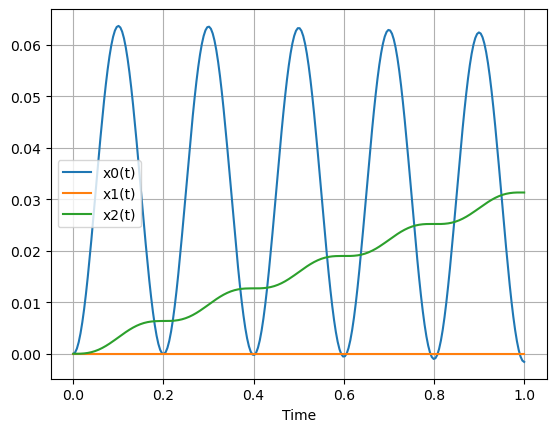

In [255]:
from scipy import *
import time
import matplotlib.pyplot as plt
t_span = [0, 1]
t = np.linspace(t_span[0], t_span[1], 250)

x0 = x0 = np.zeros(len(valid_systems[i].get_energy_storage_elements())) # Initial conditions

# Generate a forcing input at 5 hertz
omega = 2*np.pi*5 
u = lambda t: [np.sin(omega*t)]

y = integrate.odeint(valid_systems[i].dynamics, x0, t, args=(u,))

(ts, num_states) = shape(y)
plt.plot(t, y[:, 0], label='x0(t)')
plt.plot(t, y[:, 1], label='x1(t)')
plt.plot(t, y[:, 2], label='x2(t)')
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

Causal Adjacency Mask: 
 [[0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]

Power Flow Adjacency Mask: 
 [[0 1 1 1]
 [0 0 1 1]
 [0 0 0 0]
 [0 1 1 0]]

False


AssertionError: 

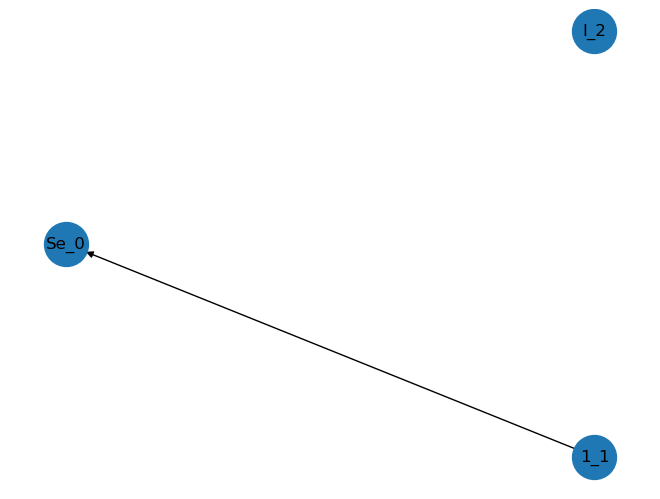

In [ ]:
labels = nx.get_node_attributes(env.bond_graph.flow_causal_graph, 'element_label')
nx.draw_shell(env.bond_graph.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

print("Causal Adjacency Mask: \n", causal_adjacency_mask)
print()
print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
print()



# print(type(list(env.bond_graph.flow_causal_graph.edges)[0]))

print(env.bond_graph.is_valid_solution())
env.bond_graph.update_state_space_matrix(verbose=True)


